<a href="https://colab.research.google.com/github/lofel888/ML_code_projects/blob/main/Diplom_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка датасета

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("raoofnaushad/eurosat-sentinel2-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'eurosat-sentinel2-dataset' dataset.
Path to dataset files: /kaggle/input/eurosat-sentinel2-dataset


In [ ]:
import os
from collections import defaultdict

# Словарь: класс -> список путей к изображениям
class_to_paths = defaultdict(list)

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            full_path = os.path.join(dirname, filename)
            # Извлекаем имя файла без расширения
            name_without_ext = os.path.splitext(filename)[0]
            # Класс — это часть до первого '_'
            if '_' in name_without_ext:
                class_name = name_without_ext.split('_', 1)[0]  # Берём только первую часть
                class_to_paths[class_name].append(full_path)
            else:
                print(f"Пропущен файл без '_' в имени: {filename}")

# Показать классы и количество изображений
print("Найденные классы:")
for class_name, paths in sorted(class_to_paths.items()):
    print(f"{class_name}: {len(paths)} изображений")

Найденные классы:
AnnualCrop: 3000 изображений
Forest: 3000 изображений
HerbaceousVegetation: 3000 изображений
Highway: 2500 изображений
Industrial: 2500 изображений
Pasture: 2000 изображений
PermanentCrop: 2500 изображений
Residential: 3000 изображений
River: 2500 изображений
SeaLake: 3000 изображений


In [ ]:
all_image_paths = []
for paths in class_to_paths.values():
    all_image_paths.extend(paths)

print(f"Всего изображений для SR: {len(all_image_paths)}")

Всего изображений для SR: 27000


In [ ]:
from PIL import Image

def make_lr_hr_pair(hr_path, scale=4):
    """
    Создаёт пару (LR_upsampled, HR) из одного HR-изображения.

    Параметры:
        hr_path: путь к изображению 64x64 (HR)
        scale: во сколько раз уменьшать (4 → 64/4 = 16)

    Возвращает:
        lr_up: PIL.Image, 64x64, размытое (вход модели)
        hr:    PIL.Image, 64x64, оригинальное (цель)
    """
    # 1. Загружаем HR
    hr = Image.open(hr_path).convert("RGB")  # всегда RGB

    # 2. Получаем размеры
    w, h = hr.size  # должно быть (64, 64)

    # 3. Уменьшаем до настоящего LR (16x16 при scale=4)
    lr = hr.resize((w // scale, h // scale), Image.BICUBIC)

    # 4. Увеличиваем LR обратно до размера HR (64x64)
    # Это и будет входом в модель — размытое, но того же размера
    lr_up = lr.resize((w, h), Image.BICUBIC)

    return lr_up, hr

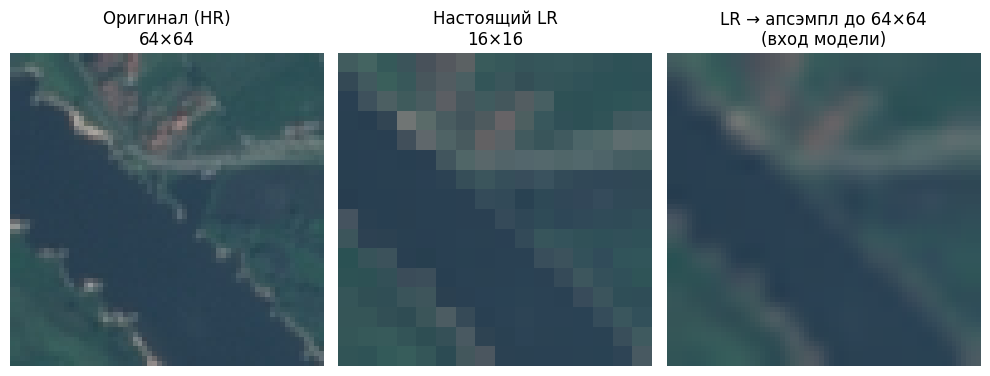

In [ ]:
import matplotlib.pyplot as plt

# Возьмите любой путь из вашего списка
sample_path = all_image_paths[8000]  # например, '/kaggle/input/Dataset/Forest_1039.jpg'

lr_up, hr = make_lr_hr_pair(sample_path, scale=4)

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.title("Оригинал (HR)\n64×64")
plt.imshow(hr)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Настоящий LR\n16×16")
plt.imshow(hr.resize((16, 16), Image.BICUBIC))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("LR → апсэмпл до 64×64\n(вход модели)")
plt.imshow(lr_up)
plt.axis("off")

plt.tight_layout()
plt.show()

UC MED

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

root_dir = "/content/drive/MyDrive/UC MED"

# Соберём все .tif файлы рекурсивно
all_image_paths = []

for class_folder in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_folder)
    if os.path.isdir(class_path):
        for file_name in os.listdir(class_path):
            if file_name.lower().endswith('.tif'):
                all_image_paths.append(os.path.join(class_path, file_name))

print(f"Найдено {len(all_image_paths)} изображений в 21 классе.")

Найдено 2100 изображений в 21 классе.


In [ ]:
class_names = sorted([d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))])
print(f"Классы ({len(class_names)} шт.):")
print(class_names)

Классы (21 шт.):
['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']


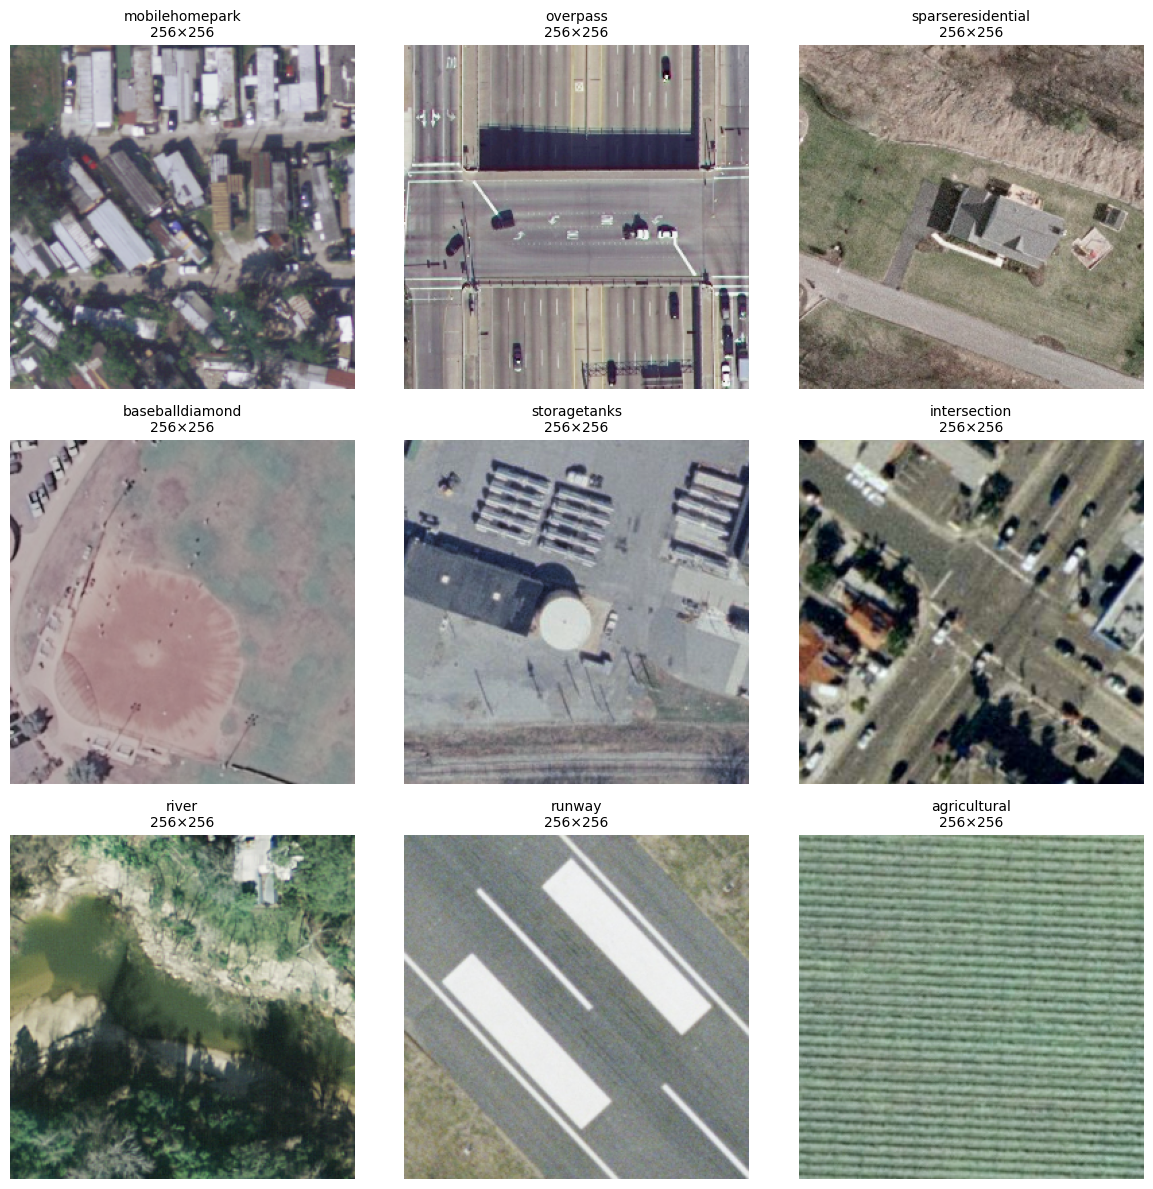

In [ ]:
import random
from PIL import Image
import matplotlib.pyplot as plt
import os

# Выберем 9 случайных изображений
sample_paths = random.sample(all_image_paths, 9)

plt.figure(figsize=(12, 12))
for i, path in enumerate(sample_paths):
    img = Image.open(path).convert("RGB")
    class_name = os.path.basename(os.path.dirname(path))
    width, height = img.size

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"{class_name}\n{width}×{height}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
!cp -r "/content/drive/MyDrive/UC MED" "/content/uc_merced"

In [ ]:
root_dir = "/content/uc_merced"

In [ ]:
from pathlib import Path
from PIL import Image
import os

root_dir = "/content/uc_merced"  # твоя основная папка с классами
root_dir_path = Path(root_dir)

# Список для новых PNG
all_image_paths = []

# Проходим по всем подпапкам
for class_folder in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_folder)
    if os.path.isdir(class_path):
        for f in os.listdir(class_path):
            if f.lower().endswith(".tif"):
                tif_path = os.path.join(class_path, f)

                # Открываем TIFF и конвертируем в RGB
                with Image.open(tif_path) as im:
                    im = im.convert("RGB")

                    # Сохраняем как PNG в той же папке
                    png_name = os.path.splitext(f)[0] + ".png"
                    png_path = os.path.join(class_path, png_name)
                    im.save(png_path)

                    all_image_paths.append(png_path)

print(f"Всего PNG изображений: {len(all_image_paths)}")


Всего PNG изображений: 2100


In [ ]:
import random
random.shuffle(all_image_paths)

# 90% train, 10% val
split = int(0.9 * len(all_image_paths))
train_paths = all_image_paths[:split]
val_paths = all_image_paths[split:]

print(f"Train: {len(train_paths)}, Val: {len(val_paths)}")

Train: 1890, Val: 210


In [ ]:
from PIL import Image

def make_lr_hr_pair(hr_path, scale=4, target_size=256):
    # Открываем изображение
    with Image.open(hr_path) as hr_img:
        # Приводим к RGB и точно к нужному размеру
        hr = hr_img.convert("RGB").resize((target_size, target_size), Image.BICUBIC).copy()

    # Создаём LR (downsampling)
    lr = hr.resize((target_size // scale, target_size // scale), Image.BICUBIC).copy()

    # Апсэмплим до размера HR
    lr_up = lr.resize((target_size, target_size), Image.BICUBIC).copy()

    return lr_up, hr



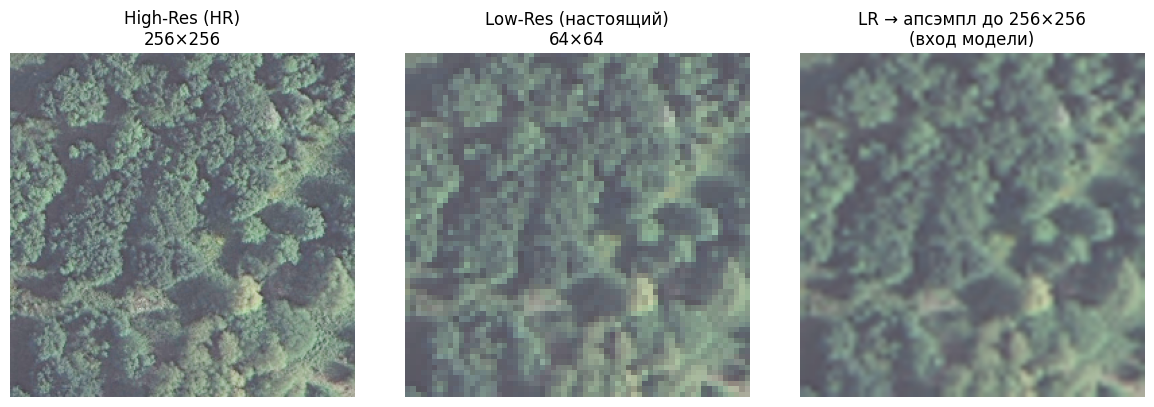

In [ ]:
import matplotlib.pyplot as plt

# Пример одного изображения
sample_path = train_paths[0]
lr_up, hr = make_lr_hr_pair(sample_path, scale=4)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("High-Res (HR)\n256×256")
plt.imshow(hr)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Low-Res (настоящий)\n64×64")
plt.imshow(hr.resize((64, 64), Image.BICUBIC))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("LR → апсэмпл до 256×256\n(вход модели)")
plt.imshow(lr_up)
plt.axis("off")

plt.tight_layout()
plt.show()

Дообучение SR3

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from PIL import Image


def make_lr_hr_pair(hr_path, scale=4, target_size=256):
    with Image.open(hr_path) as hr_img:
        # Приводим к RGB и точно к target_size
        hr = hr_img.convert("RGB").resize((target_size, target_size), Image.BICUBIC)
    # Создаём LR
    lr = hr.resize((target_size // scale, target_size // scale), Image.BICUBIC)
    # Апсэмплим до размера HR — это вход модели
    lr_up = lr.resize((target_size, target_size), Image.BICUBIC)
    return lr_up, hr

# Dataset с нормализацией до [-1, 1] — критически важно для диффузионных моделей
class SRDataset(Dataset):
    def __init__(self, image_paths, scale=4):
        self.paths = image_paths
        self.scale = scale
        # Преобразование: [0, 255] → [0, 1] → [-1, 1]
        self.transform = T.Compose([
            T.ToTensor(),  # -> [0, 1]
            T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # -> [-1, 1]
        ])

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        lr_up, hr = make_lr_hr_pair(self.paths[idx], self.scale)
        return self.transform(lr_up), self.transform(hr)

# Создаём датасет и загрузчик
train_dataset = SRDataset(train_paths, scale=4)
train_loader = DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=True,
    num_workers=2,
    pin_memory=True  # ускоряет передачу на GPU
)

# Проверка
for lr_batch, hr_batch in train_loader:
    print("LR batch shape:", lr_batch.shape)  # torch.Size([16, 3, 256, 256])
    print("HR batch shape:", hr_batch.shape)  # torch.Size([16, 3, 256, 256])

    # Проверим диапазон значений (должен быть ~[-1, 1])
    print("LR value range: [{:.2f}, {:.2f}]".format(lr_batch.min().item(), lr_batch.max().item()))
    print("HR value range: [{:.2f}, {:.2f}]".format(hr_batch.min().item(), hr_batch.max().item()))
    break

LR batch shape: torch.Size([16, 3, 256, 256])
HR batch shape: torch.Size([16, 3, 256, 256])
LR value range: [-1.00, 1.00]
HR value range: [-1.00, 1.00]


In [ ]:
class SR3Scheduler:
    def __init__(self, T=1000, beta_start=1e-4, beta_end=0.02, device="cuda"):
        self.T = T
        self.device = device

        self.betas = torch.linspace(beta_start, beta_end, T, device=device)
        self.alphas = 1.0 - self.betas
        self.alpha_bars = torch.cumprod(self.alphas, dim=0)

    def add_noise(self, x0, noise, t):
        """
        x0:    исходное изображение [B, C, H, W]
        noise: случайный шум       [B, C, H, W]
        t:     временные шаги      [B] — тензор long, на том же устройстве, что и x0
        """
        # Убедимся, что t — тензор и на правильном устройстве
        if not isinstance(t, torch.Tensor):
            t = torch.tensor(t, device=self.device, dtype=torch.long)
        else:
            t = t.to(self.device)

        # Берём alpha_bar для каждого элемента батча
        a_bar = self.alpha_bars[t].view(-1, 1, 1, 1)  # [B, 1, 1, 1]

        return torch.sqrt(a_bar) * x0 + torch.sqrt(1 - a_bar) * noise

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class ResBlock(nn.Module):
    def __init__(self, in_c, out_c, time_emb_dim=None):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_c, out_c, 3, padding=1),
            nn.GroupNorm(8, out_c),
            nn.SiLU(),
            nn.Conv2d(out_c, out_c, 3, padding=1),
            nn.GroupNorm(8, out_c),
        )
        self.skip = nn.Conv2d(in_c, out_c, 1) if in_c != out_c else nn.Identity()

        # Добавляем проекцию временного эмбеддинга
        if time_emb_dim is not None:
            self.time_proj = nn.Sequential(
                nn.SiLU(),
                nn.Linear(time_emb_dim, out_c)
            )
        else:
            self.time_proj = None

    def forward(self, x, time_emb=None):
        h = self.block(x)
        if self.time_proj is not None and time_emb is not None:
            # Добавляем временной сигнал к признакам
            time_scale = self.time_proj(time_emb)  # [B, out_c]
            h = h + time_scale[:, :, None, None]   # broadcasting по H, W
        return h + self.skip(x)

In [ ]:
class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = torch.log(torch.tensor(10000.0)) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        return torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)

In [ ]:
class SR3UNet(nn.Module):
    def __init__(self, time_emb_dim=256):
        super().__init__()

        # Временное эмбеддингование
        self.time_mlp = nn.Sequential(
            SinusoidalPositionEmbeddings(time_emb_dim),
            nn.Linear(time_emb_dim, time_emb_dim),
            nn.SiLU(),
            nn.Linear(time_emb_dim, time_emb_dim)
        )

        # Down
        self.down1 = ResBlock(6, 64, time_emb_dim=time_emb_dim)
        self.down2 = ResBlock(64, 128, time_emb_dim=time_emb_dim)
        self.down3 = ResBlock(128, 256, time_emb_dim=time_emb_dim)

        self.pool = nn.AvgPool2d(2)
        self.mid = ResBlock(256, 256, time_emb_dim=time_emb_dim)

        # Up
        self.up3 = ResBlock(256 + 256, 128, time_emb_dim=time_emb_dim)
        self.up2 = ResBlock(128 + 128, 64, time_emb_dim=time_emb_dim)
        self.up1 = ResBlock(64 + 64, 64, time_emb_dim=time_emb_dim)

        self.out = nn.Conv2d(64, 3, 1)

    def forward(self, x, lr, t):
        # Условие
        x = torch.cat([x, lr], dim=1)  # [B, 6, H, W]

        # Временное эмбеддингование
        t_emb = self.time_mlp(t)  # [B, time_emb_dim]

        # Down
        d1 = self.down1(x, t_emb)
        d2 = self.down2(self.pool(d1), t_emb)
        d3 = self.down3(self.pool(d2), t_emb)

        mid = self.mid(self.pool(d3), t_emb)

        # Up
        u3 = F.interpolate(mid, scale_factor=2, mode='nearest')
        u3 = self.up3(torch.cat([u3, d3], dim=1), t_emb)

        u2 = F.interpolate(u3, scale_factor=2, mode='nearest')
        u2 = self.up2(torch.cat([u2, d2], dim=1), t_emb)

        u1 = F.interpolate(u2, scale_factor=2, mode='nearest')
        u1 = self.up1(torch.cat([u1, d1], dim=1), t_emb)

        return self.out(u1)

In [ ]:
# Надёжное определение устройства
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Модель
model = SR3UNet().to(device)

scheduler = SR3Scheduler(T=1000, device=device)

# Оптимизатор
optimizer = torch.optim.Adam(model.parameters(), lr=2e-4)

In [ ]:
def train_step(lr, hr):
    b = hr.size(0)
    # Генерируем случайные временные шаги
    t = torch.randint(0, scheduler.T, (b,), device=device).long()  # .long() важно!

    # Генерируем шум
    noise = torch.randn_like(hr)

    # Добавляем шум к HR → x_t
    x_t = scheduler.add_noise(hr, noise, t)

    # Предсказываем шум (передаём t!)
    noise_pred = model(x_t, lr, t)  # ← ДОБАВЛЕН t

    # MSE между предсказанным и реальным шумом
    loss = F.mse_loss(noise_pred, noise)

    return loss

Epoch 0:   0%|          | 0/119 [00:00<?, ?it/s]

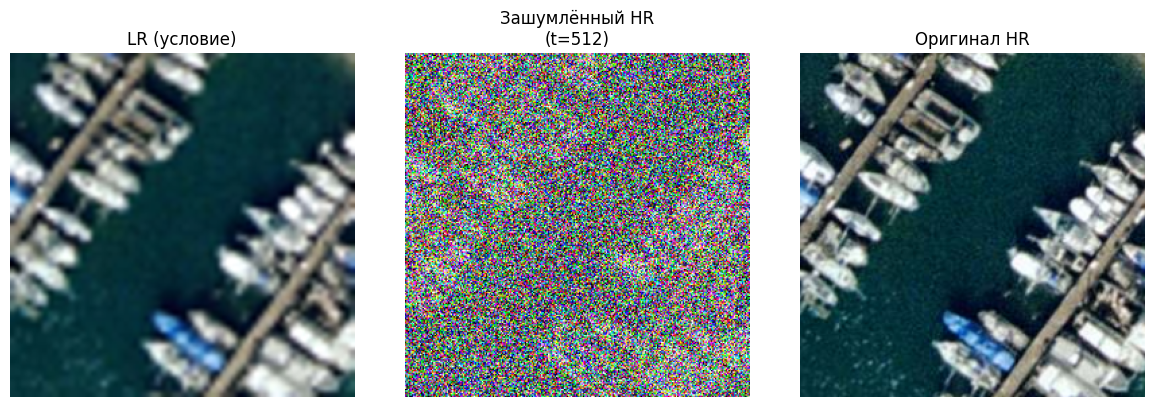

✅ Пример входов сохранён: t = 512


Epoch 0:  44%|████▎     | 52/119 [00:32<00:38,  1.75it/s, Batch Loss=0.1213]

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt

epochs = 1

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch}")

    for batch_idx, (lr, hr) in enumerate(pbar):
        lr, hr = lr.to(device), hr.to(device)

        # >>> ВЫВОД ВХОДОВ МОДЕЛИ (только в первой эпохе и первом батче) <<<
        if epoch == 0 and batch_idx == 0:
            # Генерируем t и шум
            b = hr.size(0)
            t = torch.randint(0, scheduler.T, (b,), device=device).long()
            noise = torch.randn_like(hr)
            x_t = scheduler.add_noise(hr, noise, t)

            # Визуализируем первый элемент батча
            idx = 0
            lr_vis = torch.clamp((lr[idx] + 1) / 2, 0, 1).cpu()      # денормализация
            hr_vis = torch.clamp((hr[idx] + 1) / 2, 0, 1).cpu()
            x_t_vis = torch.clamp((x_t[idx] + 1) / 2, 0, 1).cpu()

            plt.figure(figsize=(12, 4))
            plt.subplot(1, 3, 1)
            plt.title("LR (условие)")
            plt.imshow(lr_vis.permute(1, 2, 0))
            plt.axis("off")

            plt.subplot(1, 3, 2)
            plt.title(f"Зашумлённый HR\n(t={t[idx].item()})")
            plt.imshow(x_t_vis.permute(1, 2, 0))
            plt.axis("off")

            plt.subplot(1, 3, 3)
            plt.title("Оригинал HR")
            plt.imshow(hr_vis.permute(1, 2, 0))
            plt.axis("off")

            plt.tight_layout()
            plt.savefig("/content/drive/MyDrive/SR3_models/input_example.png", dpi=150)
            plt.show()

            print(f"Пример входов сохранён: t = {t[idx].item()}")

        # Обычный шаг обучения
        loss = train_step(lr, hr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        pbar.set_postfix({"Batch Loss": f"{loss.item():.4f}"})

    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch} | Avg Loss: {avg_loss:.6f}")

In [ ]:
from tqdm import tqdm

epochs = 220

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch}")

    for lr, hr in pbar:
        lr, hr = lr.to(device), hr.to(device)
        loss = train_step(lr, hr)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        pbar.set_postfix({"Batch Loss": f"{loss.item():.4f}"})

    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch} | Avg Loss: {avg_loss:.6f}")

    # Сохранение
    torch.save(model.state_dict(), f"sr3_epoch_{epoch}.pth")

Epoch 0: 100%|██████████| 119/119 [01:08<00:00,  1.74it/s, Batch Loss=0.0013]


Epoch 0 | Avg Loss: 0.020431


Epoch 1: 100%|██████████| 119/119 [01:09<00:00,  1.70it/s, Batch Loss=0.0163]


Epoch 1 | Avg Loss: 0.020493


Epoch 2: 100%|██████████| 119/119 [01:11<00:00,  1.67it/s, Batch Loss=0.0059]


Epoch 2 | Avg Loss: 0.021091


Epoch 3: 100%|██████████| 119/119 [01:12<00:00,  1.65it/s, Batch Loss=0.0025]


Epoch 3 | Avg Loss: 0.019503


Epoch 4: 100%|██████████| 119/119 [01:12<00:00,  1.63it/s, Batch Loss=0.0131]


Epoch 4 | Avg Loss: 0.020797


Epoch 5: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0017]


Epoch 5 | Avg Loss: 0.023876


Epoch 6: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0020]


Epoch 6 | Avg Loss: 0.022280


Epoch 7: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0020]


Epoch 7 | Avg Loss: 0.017205


Epoch 8: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0005]


Epoch 8 | Avg Loss: 0.017707


Epoch 9: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0006]


Epoch 9 | Avg Loss: 0.019454


Epoch 10: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0020]


Epoch 10 | Avg Loss: 0.019812


Epoch 11: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0336]


Epoch 11 | Avg Loss: 0.022130


Epoch 12: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0037]


Epoch 12 | Avg Loss: 0.019010


Epoch 13: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0282]


Epoch 13 | Avg Loss: 0.022157


Epoch 14: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0007]


Epoch 14 | Avg Loss: 0.019721


Epoch 15: 100%|██████████| 119/119 [01:14<00:00,  1.60it/s, Batch Loss=0.0050]


Epoch 15 | Avg Loss: 0.021807


Epoch 16: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0061]


Epoch 16 | Avg Loss: 0.020641


Epoch 17: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0020]


Epoch 17 | Avg Loss: 0.023412


Epoch 18: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0298]


Epoch 18 | Avg Loss: 0.021873


Epoch 19: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0081]


Epoch 19 | Avg Loss: 0.018256


Epoch 20: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0007]


Epoch 20 | Avg Loss: 0.019602


Epoch 21: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0011]


Epoch 21 | Avg Loss: 0.021861


Epoch 22: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0059]


Epoch 22 | Avg Loss: 0.020314


Epoch 23: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0142]


Epoch 23 | Avg Loss: 0.018007


Epoch 24: 100%|██████████| 119/119 [01:13<00:00,  1.63it/s, Batch Loss=0.0013]


Epoch 24 | Avg Loss: 0.019879


Epoch 25: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0023]


Epoch 25 | Avg Loss: 0.020777


Epoch 26: 100%|██████████| 119/119 [01:13<00:00,  1.63it/s, Batch Loss=0.0041]


Epoch 26 | Avg Loss: 0.017914


Epoch 27: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0033]


Epoch 27 | Avg Loss: 0.019336


Epoch 28: 100%|██████████| 119/119 [01:13<00:00,  1.63it/s, Batch Loss=0.0048]


Epoch 28 | Avg Loss: 0.020543


Epoch 29: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0140]


Epoch 29 | Avg Loss: 0.021107


Epoch 30: 100%|██████████| 119/119 [01:13<00:00,  1.63it/s, Batch Loss=0.0006]


Epoch 30 | Avg Loss: 0.019291


Epoch 31: 100%|██████████| 119/119 [01:13<00:00,  1.63it/s, Batch Loss=0.0530]


Epoch 31 | Avg Loss: 0.018874


Epoch 32: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0364]


Epoch 32 | Avg Loss: 0.016915


Epoch 33: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0048]


Epoch 33 | Avg Loss: 0.019168


Epoch 34: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0028]


Epoch 34 | Avg Loss: 0.020281


Epoch 35: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0007]


Epoch 35 | Avg Loss: 0.019156


Epoch 36: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0061]


Epoch 36 | Avg Loss: 0.018631


Epoch 37: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0064]


Epoch 37 | Avg Loss: 0.020072


Epoch 38: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0005]


Epoch 38 | Avg Loss: 0.020695


Epoch 39: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0042]


Epoch 39 | Avg Loss: 0.018694


Epoch 40: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0044]


Epoch 40 | Avg Loss: 0.017171


Epoch 41: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0174]


Epoch 41 | Avg Loss: 0.018179


Epoch 42: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0015]


Epoch 42 | Avg Loss: 0.019481


Epoch 43: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0081]


Epoch 43 | Avg Loss: 0.019379


Epoch 44: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0027]


Epoch 44 | Avg Loss: 0.016465


Epoch 45: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0005]


Epoch 45 | Avg Loss: 0.015844


Epoch 46: 100%|██████████| 119/119 [01:14<00:00,  1.60it/s, Batch Loss=0.0211]


Epoch 46 | Avg Loss: 0.016386


Epoch 47: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0024]


Epoch 47 | Avg Loss: 0.017544


Epoch 48: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0010]


Epoch 48 | Avg Loss: 0.017743


Epoch 49: 100%|██████████| 119/119 [01:14<00:00,  1.60it/s, Batch Loss=0.0131]


Epoch 49 | Avg Loss: 0.018876


Epoch 50: 100%|██████████| 119/119 [01:14<00:00,  1.60it/s, Batch Loss=0.0052]


Epoch 50 | Avg Loss: 0.017301


Epoch 51: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0063]


Epoch 51 | Avg Loss: 0.016745


Epoch 52: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0502]


Epoch 52 | Avg Loss: 0.018240


Epoch 53: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0059]


Epoch 53 | Avg Loss: 0.019775


Epoch 54: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0005]


Epoch 54 | Avg Loss: 0.018262


Epoch 55: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0066]


Epoch 55 | Avg Loss: 0.017756


Epoch 56: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0021]


Epoch 56 | Avg Loss: 0.017211


Epoch 57: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0008]


Epoch 57 | Avg Loss: 0.018700


Epoch 58: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0085]


Epoch 58 | Avg Loss: 0.017338


Epoch 59: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0089]


Epoch 59 | Avg Loss: 0.015683


Epoch 60: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0004]


Epoch 60 | Avg Loss: 0.017907


Epoch 61: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0012]


Epoch 61 | Avg Loss: 0.019761


Epoch 62: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0359]


Epoch 62 | Avg Loss: 0.018756


Epoch 63: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0287]


Epoch 63 | Avg Loss: 0.016793


Epoch 64: 100%|██████████| 119/119 [01:13<00:00,  1.63it/s, Batch Loss=0.0008]


Epoch 64 | Avg Loss: 0.019169


Epoch 65: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0702]


Epoch 65 | Avg Loss: 0.017125


Epoch 66: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0161]


Epoch 66 | Avg Loss: 0.017050


Epoch 67: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0010]


Epoch 67 | Avg Loss: 0.017190


Epoch 68: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0002]


Epoch 68 | Avg Loss: 0.016948


Epoch 69: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0024]


Epoch 69 | Avg Loss: 0.016765


Epoch 70: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0007]


Epoch 70 | Avg Loss: 0.017649


Epoch 71: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0183]


Epoch 71 | Avg Loss: 0.017385


Epoch 72: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0491]


Epoch 72 | Avg Loss: 0.015670


Epoch 73: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0013]


Epoch 73 | Avg Loss: 0.017159


Epoch 74: 100%|██████████| 119/119 [01:13<00:00,  1.63it/s, Batch Loss=0.0108]


Epoch 74 | Avg Loss: 0.018609


Epoch 75: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0003]


Epoch 75 | Avg Loss: 0.016946


Epoch 76: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0004]


Epoch 76 | Avg Loss: 0.015711


Epoch 77: 100%|██████████| 119/119 [01:13<00:00,  1.63it/s, Batch Loss=0.0787]


Epoch 77 | Avg Loss: 0.015975


Epoch 78: 100%|██████████| 119/119 [01:13<00:00,  1.63it/s, Batch Loss=0.0007]


Epoch 78 | Avg Loss: 0.018505


Epoch 79: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0004]


Epoch 79 | Avg Loss: 0.017064


Epoch 80: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0008]


Epoch 80 | Avg Loss: 0.014891


Epoch 81: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0099]


Epoch 81 | Avg Loss: 0.018444


Epoch 82: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0015]


Epoch 82 | Avg Loss: 0.018039


Epoch 83: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0010]


Epoch 83 | Avg Loss: 0.014421


Epoch 84: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0002]


Epoch 84 | Avg Loss: 0.015136


Epoch 85: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0013]


Epoch 85 | Avg Loss: 0.018113


Epoch 86: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0005]


Epoch 86 | Avg Loss: 0.016440


Epoch 87: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.1109]


Epoch 87 | Avg Loss: 0.019283


Epoch 88: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0065]


Epoch 88 | Avg Loss: 0.015880


Epoch 89: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0003]


Epoch 89 | Avg Loss: 0.017235


Epoch 90: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0038]


Epoch 90 | Avg Loss: 0.015976


Epoch 91: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0010]


Epoch 91 | Avg Loss: 0.016174


Epoch 92: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0402]


Epoch 92 | Avg Loss: 0.014914


Epoch 93: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0091]


Epoch 93 | Avg Loss: 0.016531


Epoch 94: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0743]


Epoch 94 | Avg Loss: 0.017355


Epoch 95: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0126]


Epoch 95 | Avg Loss: 0.016889


Epoch 96: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0013]


Epoch 96 | Avg Loss: 0.015126


Epoch 97: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0037]


Epoch 97 | Avg Loss: 0.017006


Epoch 98: 100%|██████████| 119/119 [01:14<00:00,  1.60it/s, Batch Loss=0.0093]


Epoch 98 | Avg Loss: 0.018395


Epoch 99: 100%|██████████| 119/119 [01:14<00:00,  1.60it/s, Batch Loss=0.0232]


Epoch 99 | Avg Loss: 0.017426


Epoch 100: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0003]


Epoch 100 | Avg Loss: 0.016463


Epoch 101: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0002]


Epoch 101 | Avg Loss: 0.018700


Epoch 102: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0023]


Epoch 102 | Avg Loss: 0.017245


Epoch 103: 100%|██████████| 119/119 [01:14<00:00,  1.60it/s, Batch Loss=0.2959]


Epoch 103 | Avg Loss: 0.018579


Epoch 104: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0014]


Epoch 104 | Avg Loss: 0.017391


Epoch 105: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0005]


Epoch 105 | Avg Loss: 0.016635


Epoch 106: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0001]


Epoch 106 | Avg Loss: 0.015179


Epoch 107: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0314]


Epoch 107 | Avg Loss: 0.017591


Epoch 108: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0122]


Epoch 108 | Avg Loss: 0.014915


Epoch 109: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0129]


Epoch 109 | Avg Loss: 0.016855


Epoch 110: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0010]


Epoch 110 | Avg Loss: 0.015797


Epoch 111: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.1234]


Epoch 111 | Avg Loss: 0.015978


Epoch 112: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0078]


Epoch 112 | Avg Loss: 0.016828


Epoch 113: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0116]


Epoch 113 | Avg Loss: 0.016216


Epoch 114: 100%|██████████| 119/119 [01:14<00:00,  1.60it/s, Batch Loss=0.0012]


Epoch 114 | Avg Loss: 0.015701


Epoch 115: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.1060]


Epoch 115 | Avg Loss: 0.016574


Epoch 116: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0003]


Epoch 116 | Avg Loss: 0.016572


Epoch 117: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0005]


Epoch 117 | Avg Loss: 0.016975


Epoch 118: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0008]


Epoch 118 | Avg Loss: 0.018136


Epoch 119: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0025]


Epoch 119 | Avg Loss: 0.015128


Epoch 120: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0325]


Epoch 120 | Avg Loss: 0.017478


Epoch 121: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0002]


Epoch 121 | Avg Loss: 0.015901


Epoch 122: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0285]


Epoch 122 | Avg Loss: 0.016918


Epoch 123: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0030]


Epoch 123 | Avg Loss: 0.016304


Epoch 124: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0003]


Epoch 124 | Avg Loss: 0.014210


Epoch 125: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.2186]


Epoch 125 | Avg Loss: 0.016726


Epoch 126: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0066]


Epoch 126 | Avg Loss: 0.017265


Epoch 127: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0002]


Epoch 127 | Avg Loss: 0.015142


Epoch 128: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0497]


Epoch 128 | Avg Loss: 0.018390


Epoch 129: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0003]


Epoch 129 | Avg Loss: 0.015119


Epoch 130: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0191]


Epoch 130 | Avg Loss: 0.015220


Epoch 131: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0092]


Epoch 131 | Avg Loss: 0.017405


Epoch 132: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0015]


Epoch 132 | Avg Loss: 0.016945


Epoch 133: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0008]


Epoch 133 | Avg Loss: 0.015109


Epoch 134: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0004]


Epoch 134 | Avg Loss: 0.015732


Epoch 135: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0129]


Epoch 135 | Avg Loss: 0.014660


Epoch 136: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0003]


Epoch 136 | Avg Loss: 0.017822


Epoch 137: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0026]


Epoch 137 | Avg Loss: 0.017131


Epoch 138: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0543]


Epoch 138 | Avg Loss: 0.017588


Epoch 139: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0009]


Epoch 139 | Avg Loss: 0.016882


Epoch 140: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0015]


Epoch 140 | Avg Loss: 0.014223


Epoch 141: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0006]


Epoch 141 | Avg Loss: 0.016348


Epoch 142: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0006]


Epoch 142 | Avg Loss: 0.018089


Epoch 143: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0060]


Epoch 143 | Avg Loss: 0.015453


Epoch 144: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0136]


Epoch 144 | Avg Loss: 0.015839


Epoch 145: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0062]


Epoch 145 | Avg Loss: 0.016005


Epoch 146: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.1856]


Epoch 146 | Avg Loss: 0.016481


Epoch 147: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0650]


Epoch 147 | Avg Loss: 0.016420


Epoch 148: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.1442]


Epoch 148 | Avg Loss: 0.018056


Epoch 149: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0095]


Epoch 149 | Avg Loss: 0.016287


Epoch 150: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0029]


Epoch 150 | Avg Loss: 0.015999


Epoch 151: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0039]


Epoch 151 | Avg Loss: 0.013157


Epoch 152: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0053]


Epoch 152 | Avg Loss: 0.015004


Epoch 153: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0046]


Epoch 153 | Avg Loss: 0.017901


Epoch 154: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0349]


Epoch 154 | Avg Loss: 0.017225


Epoch 155: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0062]


Epoch 155 | Avg Loss: 0.013779


Epoch 156: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0108]


Epoch 156 | Avg Loss: 0.016607


Epoch 157: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0267]


Epoch 157 | Avg Loss: 0.015385


Epoch 158: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0016]


Epoch 158 | Avg Loss: 0.016554


Epoch 159: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.1199]


Epoch 159 | Avg Loss: 0.015321


Epoch 160: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0005]


Epoch 160 | Avg Loss: 0.015906


Epoch 161: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0162]


Epoch 161 | Avg Loss: 0.014207


Epoch 162: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0023]


Epoch 162 | Avg Loss: 0.014947


Epoch 163: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0103]


Epoch 163 | Avg Loss: 0.015568


Epoch 164: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0193]


Epoch 164 | Avg Loss: 0.016716


Epoch 165: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0003]


Epoch 165 | Avg Loss: 0.015090


Epoch 166: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0005]


Epoch 166 | Avg Loss: 0.014592


Epoch 167: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0002]


Epoch 167 | Avg Loss: 0.014508


Epoch 168: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0251]


Epoch 168 | Avg Loss: 0.014484


Epoch 169: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0002]


Epoch 169 | Avg Loss: 0.015282


Epoch 170: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0386]


Epoch 170 | Avg Loss: 0.016407


Epoch 171: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0005]


Epoch 171 | Avg Loss: 0.015351


Epoch 172: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0012]


Epoch 172 | Avg Loss: 0.016782


Epoch 173: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0777]


Epoch 173 | Avg Loss: 0.017001


Epoch 174: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0034]


Epoch 174 | Avg Loss: 0.014784


Epoch 175: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0821]


Epoch 175 | Avg Loss: 0.014324


Epoch 176: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0007]


Epoch 176 | Avg Loss: 0.015905


Epoch 177: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0006]


Epoch 177 | Avg Loss: 0.017067


Epoch 178: 100%|██████████| 119/119 [01:14<00:00,  1.60it/s, Batch Loss=0.0003]


Epoch 178 | Avg Loss: 0.012342


Epoch 179: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0025]


Epoch 179 | Avg Loss: 0.016277


Epoch 180: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0038]


Epoch 180 | Avg Loss: 0.013901


Epoch 181: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0123]


Epoch 181 | Avg Loss: 0.014879


Epoch 182: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0006]


Epoch 182 | Avg Loss: 0.018316


Epoch 183: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0047]


Epoch 183 | Avg Loss: 0.015535


Epoch 184: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.1887]


Epoch 184 | Avg Loss: 0.015065


Epoch 185: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0253]


Epoch 185 | Avg Loss: 0.014870


Epoch 186: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0012]


Epoch 186 | Avg Loss: 0.014808


Epoch 187: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0662]


Epoch 187 | Avg Loss: 0.014618


Epoch 188: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0496]


Epoch 188 | Avg Loss: 0.015940


Epoch 189: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0252]


Epoch 189 | Avg Loss: 0.015439


Epoch 190: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0004]


Epoch 190 | Avg Loss: 0.014458


Epoch 191: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0050]


Epoch 191 | Avg Loss: 0.015301


Epoch 192: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0026]


Epoch 192 | Avg Loss: 0.013427


Epoch 193: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0014]


Epoch 193 | Avg Loss: 0.014001


Epoch 194: 100%|██████████| 119/119 [01:14<00:00,  1.60it/s, Batch Loss=0.0006]


Epoch 194 | Avg Loss: 0.015564


Epoch 195: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0299]


Epoch 195 | Avg Loss: 0.015137


Epoch 196: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0002]


Epoch 196 | Avg Loss: 0.014650


Epoch 197: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0008]


Epoch 197 | Avg Loss: 0.015896


Epoch 198: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0001]


Epoch 198 | Avg Loss: 0.015793


Epoch 199: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0047]


Epoch 199 | Avg Loss: 0.014390


Epoch 200: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0005]


Epoch 200 | Avg Loss: 0.015471


Epoch 201: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0475]


Epoch 201 | Avg Loss: 0.015638


Epoch 202: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.1017]


Epoch 202 | Avg Loss: 0.017821


Epoch 203: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0527]


Epoch 203 | Avg Loss: 0.018655


Epoch 204: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0079]


Epoch 204 | Avg Loss: 0.016165


Epoch 205: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0003]


Epoch 205 | Avg Loss: 0.015515


Epoch 206: 100%|██████████| 119/119 [01:14<00:00,  1.60it/s, Batch Loss=0.0005]


Epoch 206 | Avg Loss: 0.016805


Epoch 207: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0001]


Epoch 207 | Avg Loss: 0.015443


Epoch 208: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.1762]


Epoch 208 | Avg Loss: 0.016193


Epoch 209: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0556]


Epoch 209 | Avg Loss: 0.014546


Epoch 210: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0043]


Epoch 210 | Avg Loss: 0.015242


Epoch 211: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0003]


Epoch 211 | Avg Loss: 0.015347


Epoch 212: 100%|██████████| 119/119 [01:14<00:00,  1.60it/s, Batch Loss=0.0137]


Epoch 212 | Avg Loss: 0.014624


Epoch 213: 100%|██████████| 119/119 [01:14<00:00,  1.60it/s, Batch Loss=0.0024]


Epoch 213 | Avg Loss: 0.016384


Epoch 214: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0003]


Epoch 214 | Avg Loss: 0.015923


Epoch 215: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0072]


Epoch 215 | Avg Loss: 0.017320


Epoch 216: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0053]


Epoch 216 | Avg Loss: 0.017491


Epoch 217: 100%|██████████| 119/119 [01:13<00:00,  1.61it/s, Batch Loss=0.0002]


Epoch 217 | Avg Loss: 0.016576


Epoch 218: 100%|██████████| 119/119 [01:14<00:00,  1.61it/s, Batch Loss=0.0155]


Epoch 218 | Avg Loss: 0.016257


Epoch 219: 100%|██████████| 119/119 [01:13<00:00,  1.62it/s, Batch Loss=0.0150]

Epoch 219 | Avg Loss: 0.015635


In [ ]:
import os

save_dir = "/content/drive/MyDrive/SR3_models"
os.makedirs(save_dir, exist_ok=True)

# Сохраняем каждый epoch
torch.save(model.state_dict(), os.path.join(save_dir, f"sr3_epoch_{epoch}.pth"))


In [ ]:
@torch.no_grad()
def sr3_sample(lr, steps=1000):
    device = lr.device
    b, c, h, w = lr.shape

    # Начинаем с чистого шума
    x = torch.randn(b, c, h, w, device=device)

    # Постепенно денозим
    for i in reversed(range(steps)):
        t = torch.full((b,), i, device=device, dtype=torch.long)  # [B] — тензор времени

        # Предсказываем шум (ОБЯЗАТЕЛЬНО передаём t!)
        eps = model(x, lr, t)

        # Берём параметры по индексу i (скалярные значения)
        alpha = scheduler.alphas[i]
        alpha_bar = scheduler.alpha_bars[i]
        beta = scheduler.betas[i]

        # Коэффициенты из DDPM
        if i > 0:
            noise = torch.randn_like(x)
        else:
            noise = torch.zeros_like(x)

        # Обратный шаг
        x = (1 / torch.sqrt(alpha)) * (
            x - ((1 - alpha) / torch.sqrt(1 - alpha_bar)) * eps
        ) + torch.sqrt(beta) * noise

    return x

In [ ]:
# Создаём валидационный датасет и загрузчик
val_dataset = SRDataset(val_paths, scale=4)
val_loader = DataLoader(
    val_dataset,
    batch_size=16,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

In [ ]:
# Путь к сохранённой модели на Google Диске
model_path = "/content/drive/MyDrive/SR3_models/sr3_epoch_219.pth"  # ← укажите нужную эпоху

# Загружаем веса
model.load_state_dict(torch.load(model_path, map_location=device))

# Переводим модель в eval-режим
model.eval()
print(f"Модель загружена из: {model_path}")

Модель загружена из: /content/drive/MyDrive/SR3_models/sr3_epoch_219.pth


In [ ]:
# Установка зависимостей
!pip install torchmetrics lpips -q

# Перезагрузка модулей (иногда нужно в Colab)
import importlib
import sys
if 'torchmetrics' in sys.modules:
    importlib.reload(sys.modules['torchmetrics'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.9 MB/s eta 0:00:00


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 135MB/s]


Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/alex.pth
PSNR: 17.49 dB
SSIM: 0.6074
LPIPS: 0.2377


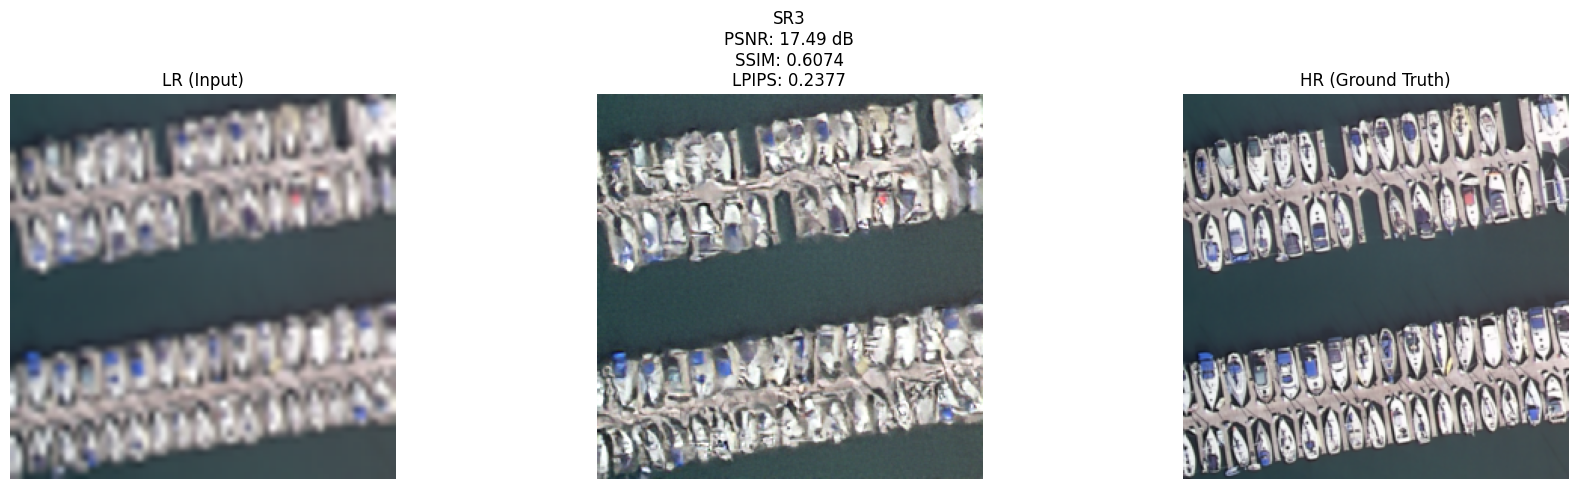

In [ ]:
import torch
import matplotlib.pyplot as plt
from torchmetrics.image import StructuralSimilarityIndexMeasure
import torch.nn.functional as F
import lpips  # ← добавлена поддержка LPIPS

# Инициализируем LPIPS модель (делаем один раз)
loss_fn_lpips = lpips.LPIPS(net='alex', spatial=False).to(device)  # или net='vgg'

# Убедитесь, что модель в eval-режиме
model.eval()

# Берём один пример из валидации
lr, hr = next(iter(val_loader))
lr = lr[:1].to(device)  # [1, 3, 256, 256]
hr = hr[:1].to(device)  # ← переместим на device для LPIPS

# Генерация SR
sr = sr3_sample(lr, steps=1000)  # [1, 3, 256, 256]

# Денормализация до [0, 1] для визуализации и PSNR/SSIM
lr_vis = torch.clamp((lr[0] + 1) / 2, 0, 1).cpu()
sr_vis = torch.clamp((sr[0] + 1) / 2, 0, 1).cpu()
hr_vis = torch.clamp((hr[0] + 1) / 2, 0, 1).cpu()

# === Расчёт метрик ===
# PSNR
mse = F.mse_loss(sr_vis, hr_vis)
if mse == 0:
    psnr = float('inf')
else:
    psnr = 20 * torch.log10(1.0 / torch.sqrt(mse))

# SSIM
ssim_metric = StructuralSimilarityIndexMeasure(data_range=1.0)
ssim_score = ssim_metric(sr_vis.unsqueeze(0), hr_vis.unsqueeze(0))

# LPIPS: требует данные в диапазоне [-1, 1] и на том же устройстве
sr_lpips = sr  # уже в [-1, 1], на device
hr_lpips = hr  # уже в [-1, 1], на device
lpips_score = loss_fn_lpips(sr_lpips, hr_lpips).mean().item()

# Вывод значений
print(f"PSNR: {psnr:.2f} dB")
print(f"SSIM: {ssim_score:.4f}")
print(f"LPIPS: {lpips_score:.4f}")

# === Визуализация ===
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(lr_vis.permute(1, 2, 0))
plt.title("LR (Input)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(sr_vis.permute(1, 2, 0))
plt.title(f"SR3\nPSNR: {psnr:.2f} dB\nSSIM: {ssim_score:.4f}\nLPIPS: {lpips_score:.4f}")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(hr_vis.permute(1, 2, 0))
plt.title("HR (Ground Truth)")
plt.axis("off")

plt.tight_layout()
plt.show()

Baseline EDSR

In [ ]:
!pip install basicsr -q
!pip install torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.4/299.4 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 27.2 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import lpips
import random

# --- Устройство ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- LPIPS ---
loss_fn_lpips = lpips.LPIPS(net='alex', spatial=False).to(device)

# --- Денормализация ---
def denorm(x):
    return torch.clamp((x + 1) / 2, 0, 1)

# --- Случайный выбор изображения из val_dataset ---
# Предполагается, что у вас есть: val_dataset (SRDataset)
idx = random.randint(0, len(val_dataset) - 1)
lr_full, hr = val_dataset[idx]  # это PIL → Tensor в [-1,1]

# Добавляем batch dimension и переносим на устройство
lr_full = lr_full.unsqueeze(0).to(device)  # [1, 3, 256, 256]
hr = hr.unsqueeze(0).to(device)            # [1, 3, 256, 256]

# Настоящий LR (64x64) для Bicubic
real_lr = F.interpolate(lr_full, size=(64, 64), mode='bicubic', align_corners=False)

# --- Генерация результатов ---
with torch.no_grad():
    sr_bicubic = F.interpolate(real_lr, size=(256, 256), mode='bicubic', align_corners=False)
    sr_sr3 = sr3_sample(lr_full, steps=1000)

# --- Расчёт метрик ---
def calculate_metrics(sr, hr):
    lpips_score = loss_fn_lpips(sr.to(device), hr.to(device)).mean().item()
    return lpips_score

lpips_bic = calculate_metrics(sr_bicubic, hr)
lpips_sr3 = calculate_metrics(sr_sr3, hr)

# Вывод
print("Метрики на случайном изображении:")
print(f"Bicubic — LPIPS: {lpips_bic:.4f}")
print(f"SR3     — LPIPS: {lpips_sr3:.4f}")

# Визуализация
plt.figure(figsize=(20, 5))

images = [
    (denorm(lr_full[0]).cpu(), "LR (Входное)"),
    (denorm(sr_bicubic[0]).cpu(), f"Bicubic\nLPIPS: {lpips_bic:.4f}"),
    (denorm(sr_sr3[0]).cpu(), f"SR3\nLPIPS: {lpips_sr3:.4f}"),
    (denorm(hr[0]).cpu(), "HR (Исходное)")
]

for i, (img, title) in enumerate(images, 1):
    plt.subplot(1, 4, i)
    plt.imshow(img.permute(1, 2, 0))
    plt.title(title, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()